<a href="https://colab.research.google.com/github/asthanas/DataScienceProjects/blob/master/Airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Domain Name**
**Environment**
**Air quality**

**Dataset**
Air quality of an Italian city

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

Missing values are tagged with -200 value. 

Attributes of the dataset are:

0.	 Date (DD/MM/YYYY) 
1.	Time (HH.MM.SS)
2.	True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3.	PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4.	True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5.	True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
6.	PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 
7.	True hourly averaged NOx concentration in ppb (reference analyzer) 
8.	PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9.	True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 

10.	PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 
11.	 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
12.	 Temperature in °C 
13.	 Relative Humidity (%) 
14.	 AH Absolute Humidity

Problem
Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100 % relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling ­us off. For example, if the air temperature e is 75 degrees Fahrenheit (24 degrees Celsius) and the relative humidity is zero percent, the air temperature feels like 69 degrees Fahrenheit (21 C) to our bodies. If the air temperature is 75 degrees Fahrenheit (24 C) and the relative humidity is 100 percent, we feel like it's 80 degrees (27 C) out. 

**The objective is to predict the Relative Humidity at a given point of time based on all other attributes affecting the change in RH.**



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',25)
rcParams['figure.figsize']=10,8

In [0]:
data=pd.read_csv("AirQualityUCI.csv")

In [0]:
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,3/11/2004,1:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,3/11/2004,2:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,3/11/2004,3:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


Loading data

In [0]:
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
data_air=pd.read_csv('AirQualityUCI.csv',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)
data_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [0]:
data_air.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [0]:
data_air.dropna(how='all',inplace=True)
data_air.dropna(thresh=10,axis=0,inplace=True)

In [0]:

data_air.shape

(8991, 15)

In [0]:
data_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Data Cleaning

In [0]:
data_air['HOUR']=data_air['TIME'].apply(lambda x : int(x.split(':')[0]))
data_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

Missing Values

In [0]:
print('Count of missing values :\n',data_air.shape[0]-data_air.count())

Count of missing values :
 DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


Fill missing value strategy

-CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour

-NHHC_GT will be dropped as it has 90% missing data

In [0]:
from datetime import datetime

In [0]:
data_air['DATE']=pd.to_datetime(data_air.DATE, format='%m/%d/%Y')   #Format date column

In [0]:
data_air.set_index('DATE',inplace=True)

In [0]:
data_air['MONTH']=data_air.index.month
data_air.reset_index(inplace=True)


In [0]:
data_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3


NMHC_GT will be dropped as it has 90% missing data

In [0]:
data_air.drop('NMHC_GT',axis=1,inplace=True)

In [0]:
data_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3


In [0]:
data_air['CO_GT']=data_air['CO_GT'].fillna(data_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
data_air['NOX_GT']=data_air['NOX_GT'].fillna(data_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
data_air['NO2_GT']=data_air['NO2_GT'].fillna(data_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [0]:
print('Left out missing value:',data_air.shape[0]-data_air.count() )

Left out missing value: DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


In [0]:
data_air['CO_GT']=data_air['CO_GT'].fillna(data_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
data_air['NOX_GT']=data_air['NOX_GT'].fillna(data_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
data_air['NO2_GT']=data_air['NO2_GT'].fillna(data_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

In [0]:
print('Left out missing value:',data_air.shape[0]-data_air.count() )

Left out missing value: DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
HOUR            0
MONTH           0
dtype: int64


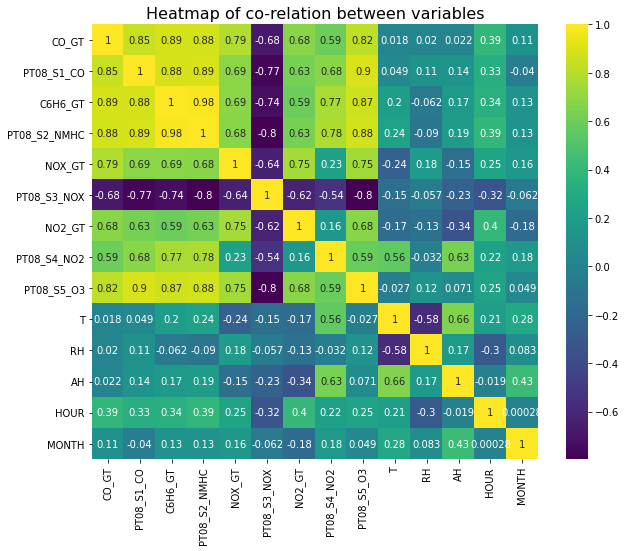

In [0]:
sns.heatmap(data_air.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

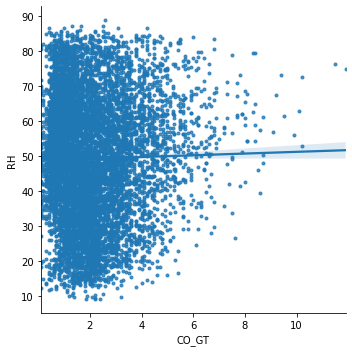

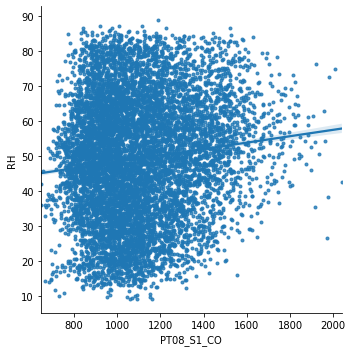

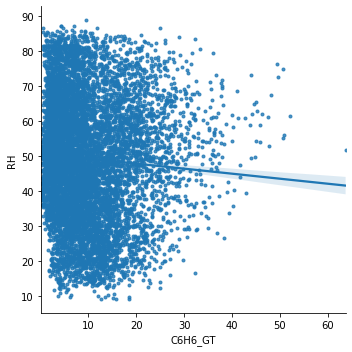

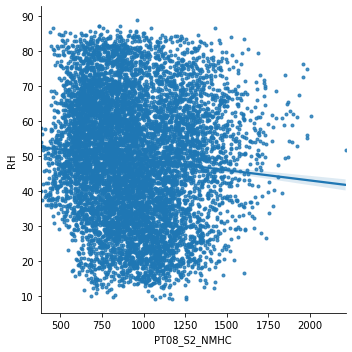

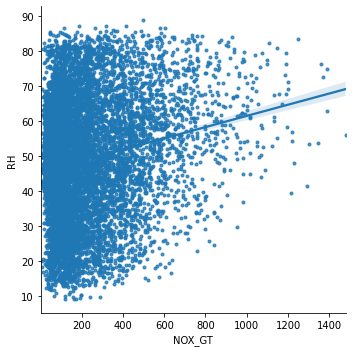

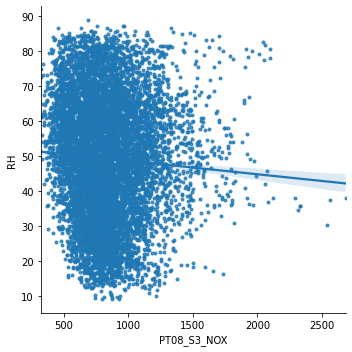

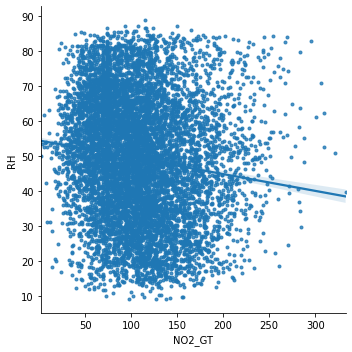

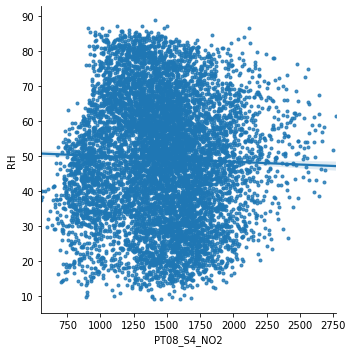

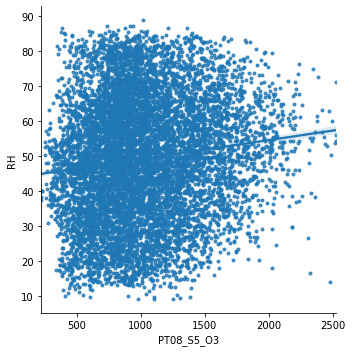

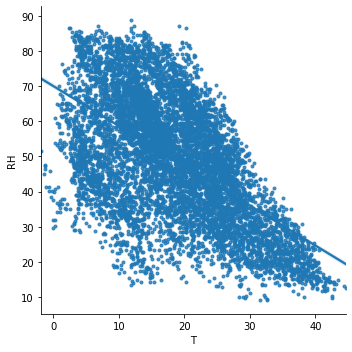

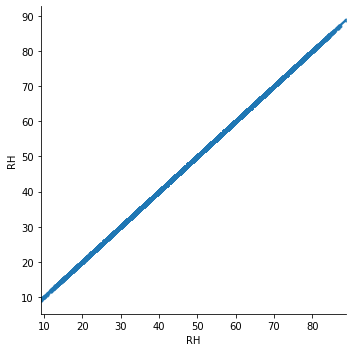

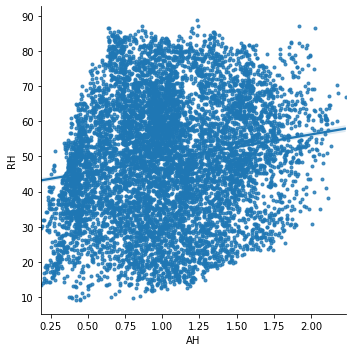

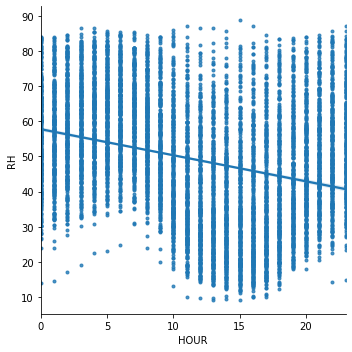

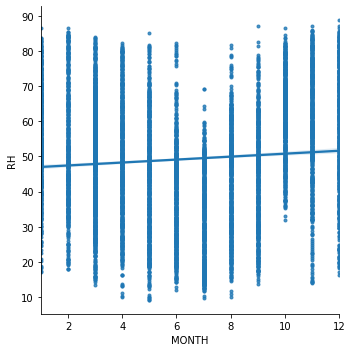

In [0]:

#plot all X-features against output variable RH
col_=data_air.columns.tolist()[2:]
for i in data_air.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=data_air,markers='.')

# **Linear Regression**

In [0]:

from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [0]:
X=data_air[col_].drop('RH',1)
y=data_air['RH']

In [0]:
ss=StandardScaler()     #initiatilise

In [0]:
X_std=ss.fit_transform(X)     #apply stardardisation

In [0]:
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

In [0]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6293, 13)
Test data size: (2698, 13)


In [0]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)    

In [0]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 49.21763046095795
--------------------------------
Slope:


[('CO_GT', -1.7367447259994704),
 ('PT08_S1_CO', 3.4037741865264235),
 ('C6H6_GT', -5.697492496373183),
 ('PT08_S2_NMHC', -1.196234248325735),
 ('NOX_GT', 3.5036899671340884),
 ('PT08_S3_NOX', -0.7001846893676572),
 ('NO2_GT', -1.1080890551814262),
 ('PT08_S4_NO2', 6.877135083115159),
 ('PT08_S5_O3', -1.2881546341603554),
 ('T', -20.184910618985867),
 ('AH', 12.063387650671057),
 ('HOUR', -0.6178414096506816),
 ('MONTH', 1.33992833747474)]

**Prediction**

In [0]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 6.012894371219269


This means that we can predict RH using all the features together with RMSE as 6.01. Let us call it as baseline model.

In [0]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=data_air[feature]
    y=data_air['RH']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [0]:
col_.remove('RH')        #remove output

In [0]:
print('List of features:',col_)    #print list of features

List of features: ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR', 'MONTH']


In [0]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('-------------------------')
print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
print('-------------------------')
print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[2:9]))
print('-------------------------')
print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
print('-------------------------')
print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))
print('-------------------------')
print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))

RMSE with Features as ['CO_GT', 'PT08_S1_CO'] 17.10722324985973
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX'] 14.78792447985586
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3'] 12.875243451046265
-------------------------
RMSE with Features as ['PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT'] 13.364102349517683
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH'] 6.096537988670569
-------------------------
RMSE with Features as ['PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR'] 6.071109936275443
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', '

# **Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

In [0]:

dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

In [0]:
#calculate RMSE
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.3689815382929036


# **Random Forest Regression**
Let us apply Random Forest regression and measure RMSE

In [0]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

In [0]:
rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

In [0]:
#Calculate RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 0.7172384894708003


In [0]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

In [0]:
rf_model_two=rf_grid.fit(X_train,y_train)     #fit the model wtih all grid parameters

In [0]:
y_pred_rf_two=rf_model_two.predict(X_test)        #predict

In [0]:
#Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))

RMSE using RF grid search method 1.9649152844150208


Applying Random Forest regression the predicted RMSE has improved to 0.71, the default RF algorithm is giving better RMSE value than grid search applied different parameters

# **Conclusion**:
For designing the model for predicting RH, I have applied Linear Regression, Decision Tree, Random Forest. When tested on test data below are RMSE obtained from different algorithms:

RMSE:

-Linear Regression: 6.01

-Decision Tree: 1.35

-Random Forest: 0.71